# 030

In [1]:
import yaml
import numpy as np

set_name = "030"
ncwo = "ncwomax"

In [2]:
def get_MADs(data):
    MADs = []
    for set in data:
        ADs = []
        for system in data[set]:
            ADs.append(data[set][system]["AD"])
        MADs.append(np.mean(ADs))
    return MADs

def get_Sets(data):
    Sets = []
    for set in data:
        Sets.append(set)
    return Sets

def get_Descriptions(subsets):
    f_des = open('Sets_description.yaml', 'r')
    d_des = yaml.safe_load(f_des)
    descriptions = []
    for set in subsets:
        descriptions.append(d_des[set])
    return descriptions

In [3]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool, TapTool
import math
from bokeh.transform import factor_cmap
from bokeh.palettes import Category10

nof = "GNOF"
file = open('{}-{}-{}.yaml'.format(set_name,nof,ncwo), 'r')
data = yaml.safe_load(file)
subsets = get_Sets(data)
description = get_Descriptions(subsets)

nofs = ["PNOF5", "PNOF7s", "PNOF7", "GNOF", "GNOFm"]

data = {'subsets' : subsets}
for nof in nofs:
    if nof=="GNOFm":
        file = open('{}-{}-{}.yaml'.format(set_name,"GNOFm",ncwo), 'r')
    else:
        file = open('{}-{}-{}.yaml'.format(set_name,nof,ncwo), 'r')
    yaml_data = yaml.safe_load(file)
    counts = get_MADs(yaml_data)
    data[nof] = counts

descriptions = {'subsets' : subsets,
        'PNOF5'   : description,
        'PNOF7s'  : description,
        'PNOF7'   : description,
        'GNOF'    : description,
        'GNOFm'   : description}

x = [ (subset, nof) for subset in subsets for nof in nofs ]
counts = sum(zip(data['PNOF5'], data['PNOF7s'], data['PNOF7'], data['GNOF'], data['GNOFm']), ()) # like an hstack
descriptions = sum(zip(descriptions['PNOF5'], descriptions['PNOF7s'], descriptions['PNOF7'], descriptions['GNOF'], descriptions['GNOFm']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts, descriptions=descriptions, nofs=[f for _,f in x]))

p = figure(x_range=FactorRange(*x), width=2000, height=350, toolbar_location="left", title="030 Perfect Pairing")

p.vbar(x='x', top='counts', width=1.0, source=source, line_color="white", legend_field="nofs",
       fill_color=factor_cmap('x', palette=Category10[len(nofs)], factors=nofs, start=1, end=2))

p.y_range.start = 0
p.y_range.end = 50
p.xaxis.major_label_text_font_size = "0pt"
#p.xaxis.major_label_orientation = math.pi/2
p.xaxis.group_label_orientation = math.pi/2
p.xaxis.axis_label = "Sets"
p.yaxis.axis_label = "MAD (kcal/mol)"
p.xgrid.grid_line_color = None

p.legend.location = "top_left"
p.legend.orientation = "horizontal"

hover = HoverTool(tooltips=[
    ("Description", "@descriptions"),
    ("MAD", "@counts"),
])
p.add_tools(hover)

show(p)

In [17]:
import matplotlib.pyplot as plt
from myst_nb import glue
import numpy as np

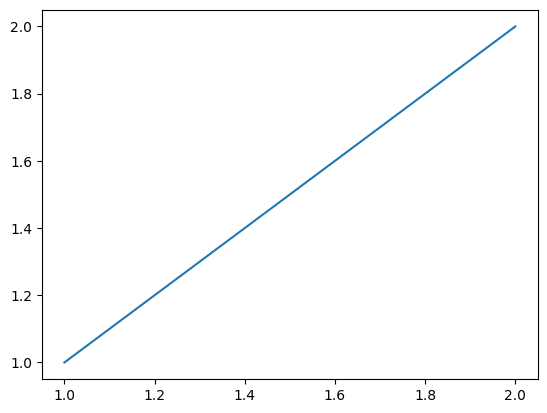

In [18]:
fig, ax = plt.subplots()
x = np.linspace(1,2,3)
ax.plot(x,x)

glue("boot_fig", fig, display=False)

```{code-cell}
:label: markdown-myst
print("Here's some python!")
```

Texto 1

```{glue:} boot_fig2
```

Texto2

````{tab-set}
```{tab-item} Tab 1 title
My first tab
```

```{tab-item} Tab 2 title
My second tab with `some code`!
```
````

<div class="admonition note" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">This is the **title**</p>
This is the *content*
</div>

<div>This is some HTML content.</div>
<script>
  // You can include JavaScript here as well.
  console.log("Hello from JavaScript in Jupyter Book!");
</script>

In [13]:
import nglview
view = nglview.show_pdbid("3pqr")  # load "3pqr" from RCSB PDB and display viewer widget
view

NGLWidget()

```{code-cell}
# This cell is intentionally left blank.  It's needed for Jupyter Book to capture the output.

In [6]:
import ipywidgets as widgets
from IPython.display import display
import py3Dmol

import yaml
import numpy as np

nof = "GNOF"
file = open('{}-{}-{}.yaml'.format(set_name,nof,ncwo), 'r')
data = yaml.safe_load(file)

master_tabs = widgets.Tab()

tabs = []
for h,set in enumerate(data):
    set_tab = widgets.Tab()
    set_tab.children = [widgets.VBox() for system in data[set]]
    for i,system in enumerate(data[set]):
        set_tab.set_title(i, str(system))

        mols_tab = widgets.Tab()
        mols_tab.children = [widgets.VBox() for specie in data[set][system]["Species"]]
        childrens = []
        for j,specie in enumerate(data[set][system]["Species"]):
            url = "url:https://raw.githubusercontent.com/felipelewyee/DietGMTKN55-NOF/refs/heads/main/fig/{}/{}-{}.xyz".format(set_name, set, specie) 
            viewer = py3Dmol.view(url, width=400, height=300)
            viewer.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
            viewer.zoomTo()
            childrens.append(widgets.Output()) 
            with childrens[-1]:
                viewer.show()
        mols_tab.children = childrens
        for j,specie in enumerate(data[set][system]["Species"]):
            mols_tab.set_title(j, str(specie))

        text_specie = "| Specie | E_NOF | Count |\n"
        for specie in data[set][system]["Species"]:
            text_specie += "| {} | {} |\n".format(specie, data[set][system]["Species"][specie]["Count"])
                                                #data[set][system]["Species"][specie]["Charge"], 
                                                #data[set][system]["Species"][specie]["Multiplicity"])
 
        text_specie_w = widgets.Textarea(
            value=text_specie,
            placeholder='Type something',
            description='Molecules',
            disabled=True   
        )

        text_E_ref_w = widgets.Textarea(
            value="{:.3f}".format(data[set][system]["E_Ref"]),
            placeholder='Type something',
            description='E_Ref',
            disabled=True   
        )

        text_weight_w = widgets.Textarea(
            value="{:.3f}".format(data[set][system]["Weight"]),
            placeholder='Type something',
            description='Weight',
            disabled=True   
        )

        set_tab.children[i].children = [mols_tab, text_specie_w,
                                         text_E_ref_w, text_weight_w]
    tabs.append(set_tab)

master_tabs.children = tabs
for i,set in enumerate(data):
    master_tabs.set_title(i, str(set))

display(master_tabs)